### Observations:

1. A city's weather temperature goes down as its latitude gets farther form the equator (0 degrees). The temperature v. latitude scatter plot supports this. Also, given the high number of samples and the reasonably even spread of those samples between -60 and 80 degrees of latitude we can infer that the observed patter in strong.

2. According to the humidity v. latitude scatter plot, the tightest concentration of 100% humidity weather in the sampled cities occurred for latitudes within +/-20 degrees of the equator (0 degrees). This is to be expected since any city in this region falls within what is known as the tropical zone, characterized by large tropical forests. Note, there are large portions of Africa, Arabia, and Australia within tropical zone which are deserts, as such cities in the sample population near these deserts likely account for some of the significantly lower humidity points in the graph.

3. Based on the wind speed v. latitude plot, there appears to be no correlation between latitude and wind speed. With the exception of a handful of cities, wind speed across all sampled latitudes remained between 0-30 mph. This fact lends itself to support the classification of hurricanes and tornadoes as extreme weather cases, given that wind speeds during these events greatly exceed what appears to be normal rang across much of the planet.


In [229]:
# Dependencies
import requests as req
import json
import gzip
import random
import datetime as dt
import matplotlib.pyplot as plt
from citipy import citipy
import pandas as pd
import numpy as np



In [230]:
# API key
api_key = ""

# set base url for owp current weather requests
base_url = "http://api.openweathermap.org/data/2.5/weather"

units = "imperial"


### Build random sample of lat/lng coordinates

In [244]:
# derive random lat/lng coordinates to use ac citipy inputs
lat_sample = []
lng_sample = []

for i in range(750): #will need to be much higher for final run
    i = random.uniform(-90.00, 90.00)
    lat_sample.append(i)

for j in range(750): #will need to be much higher for final run
    j = random.uniform(-180.00, 180.00)
    lng_sample.append(j)

#print(lat_sample)
#print(lng_sample)

# zip lat and lng samples into dict for use with citipy
latlng_dict = dict(zip(lat_sample, lng_sample))
#print(latlng_dict)


In [245]:
# create df to be populated: include random coordinates
city_df = pd.DataFrame()
city_df["City"] = ""
city_df["Country"] = ""
city_df["Lat"] = lat_sample
city_df["Lng"] = lng_sample
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Date"] = ""
city_df = city_df[["City", "Country", "Lat", "Lng", "Date", "Max Temp",
                   "Humidity", "Cloudiness", "Wind Speed"]]
city_df.count()

City            0
Country         0
Lat           750
Lng           750
Date          750
Max Temp      750
Humidity      750
Cloudiness    750
Wind Speed    750
dtype: int64

### Use citipy to match random coordinates to actual city names

In [246]:
# iterrate city_df through citipy to fill city and country
for index, row in city_df.iterrows():
    city_code = citipy.nearest_city(row["Lat"], row["Lng"])
    city_df.set_value(index, "City", city_code.city_name)
    city_df.set_value(index, "Country", city_code.country_code)
    
city_df.count()

City          750
Country       750
Lat           750
Lng           750
Date          750
Max Temp      750
Humidity      750
Cloudiness    750
Wind Speed    750
dtype: int64

In [247]:
# clear randomly generated lat & lng values for replacement by owm values
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,barentsburg,sj,,,,,,,
1,saskylakh,ru,,,,,,,
2,amderma,ru,,,,,,,
3,belushya guba,ru,,,,,,,
4,mys shmidta,ru,,,,,,,


### Make owm API call and populate city_df with data from JSON response

In [248]:
# itterate city_df cities to fill empty columns and replace random sample coordinates with owm data

for index, row in city_df.iterrows():
    try:
        target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&APPID=%s&units=%s" % (row["City"], api_key, units)
        weather_data = req.get(target_url).json()
        city_df.set_value(index, "Lng", weather_data["coord"]["lon"])
        city_df.set_value(index, "Lat", weather_data["coord"]["lat"])
        city_df.set_value(index, "Max Temp", weather_data["main"]["temp_max"])
        city_df.set_value(index, "Humidity", weather_data["main"]["humidity"])
        city_df.set_value(index, "Cloudiness", weather_data["clouds"]["all"])
        city_df.set_value(index, "Wind Speed", weather_data["wind"]["speed"])
        city_df.set_value(index, "Date", str(weather_data["dt"]))
    except KeyError:
        if weather_data["cod"] == "404":
            print(weather_data["message"] + ". Skipping...")
    
    print(target_url)

    
#    print(json.dumps(weather_data, indent=4))
# dt.date.fromtimestamp(int(weather_data["dt"])).strftime("%Y-%m-%d")

city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=amderma&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=shunyi&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=vostok&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=nadym&APPID=f37c799063873e4e92effc4350a3c35b&uni

http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=tiksi&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bilma&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=resistencia&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=tekeli&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bara&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=nichinan&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial

http://api.openweathermap.org/data/2.5/weather?q=lufilufi&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=caravelas&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=puerto del rosario&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=abu kamal&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=puerto princesa&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=castro&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=krasnyy yar

http://api.openweathermap.org/data/2.5/weather?q=hobart&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bollnas&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=albany&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=torbay&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=barrow&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=atuona&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=santo antonio do sudoeste&APPID=f37c799063873e4e92effc4350a3c35

http://api.openweathermap.org/data/2.5/weather?q=charlestown&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=pisco&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=sambava&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=esperance&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=paraiso&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bluff&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kabompo&APPID=f37c799063873e4e92effc4350a3c35b&unit

http://api.openweathermap.org/data/2.5/weather?q=khor&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=castro&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=bhuj&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=bajram curri&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?q=padang&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=albany&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=stromness&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=fort frances&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=avarua&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=mairana&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=lodja&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kendari&APPID=f37c799063873e4e92effc4350a3c35b&units=imp

http://api.openweathermap.org/data/2.5/weather?q=bilma&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=sioux lookout&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=barkly west&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=kokkola&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=petatlan&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=vaini&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=barrow&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kota belud&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=alihe&APPID=f37c799063873e

http://api.openweathermap.org/data/2.5/weather?q=vila velha&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=hobart&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=torbay&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=port-gentil&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=tigil&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=mataura&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=f37c799063873e4

http://api.openweathermap.org/data/2.5/weather?q=port macquarie&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=we&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=port alfred&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=micheweni&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=barrow&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=santa comba&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=hovd&APPID=f37c79

http://api.openweathermap.org/data/2.5/weather?q=flinders&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=homer&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=isangel&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=isangel&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=norman wells&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=samalaeulu&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kapaa&APPID=f37c799063873e4e92effc4350a3c35b&units=imperial
city not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=

### Clean city_df of any cities owm did not find, leaving empty cells

In [249]:
# replace blank cells witn nan
city_df.replace('', np.nan, inplace=True)

city_df.count()

City          750
Country       750
Lat           653
Lng           653
Date          653
Max Temp      653
Humidity      653
Cloudiness    653
Wind Speed    653
dtype: int64

In [250]:
# remove any rows rows from sample which containing a nan value
city_df.dropna(axis=0, how="any", inplace=True)
city_df.count()

City          653
Country       653
Lat           653
Lng           653
Date          653
Max Temp      653
Humidity      653
Cloudiness    653
Wind Speed    653
dtype: int64

In [251]:
city_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,saskylakh,ru,71.92,114.08,1512795639,-7.94,65.0,44.0,6.85
5,shunyi,cn,40.12,116.65,1512793800,46.40,19.0,0.0,4.47
6,vostok,ru,46.49,135.88,1512795970,-2.36,68.0,44.0,2.53
7,nadym,ru,65.53,72.52,1512795641,16.95,86.0,80.0,7.85
8,kokopo,pg,-4.35,152.26,1512795971,79.59,100.0,80.0,5.28


### Send final city_df data to .csv

In [260]:
# save the final df as a csv
city_df.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

### Build a scatter plots for each required comparison

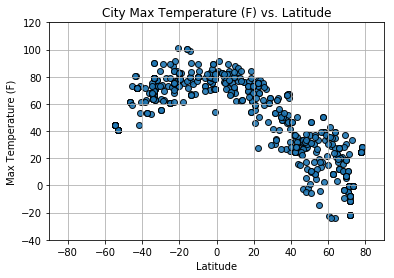

In [261]:
# temp v. lat
plt.scatter(city_df["Lat"], 
            city_df["Max Temp"],
            edgecolor="k", linewidths=1, marker="o", 
            alpha=0.9)

# format graph 
plt.grid()
plt.xlim([-90, 90])
plt.ylim([-40, 120])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Temperature (F) vs. Latitude")

# save figure
plt.savefig("temp_lat.png")

# show plot
plt.show()

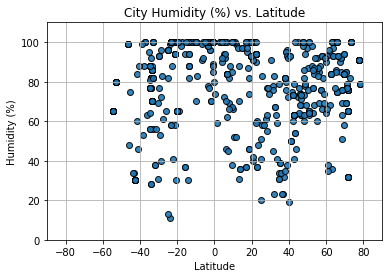

In [262]:
# humid v. lat
plt.scatter(city_df["Lat"], 
            city_df["Humidity"],
            edgecolor="k", linewidths=1, marker="o", 
            alpha=0.9)

# format graph 
plt.grid()
plt.xlim([-90, 90])
plt.ylim([0, 110])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity (%) vs. Latitude")

# save figure
plt.savefig("humidity_lat.png")

# show plot
plt.show()

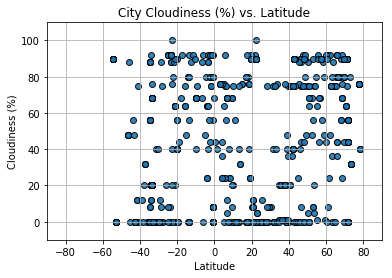

In [263]:
# clouds v. lat
plt.scatter(city_df["Lat"], 
            city_df["Cloudiness"],
            edgecolor="k", linewidths=1, marker="o", 
            alpha=0.9)

# format graph 
plt.grid()
plt.xlim([-90, 90])
plt.ylim([-10, 110])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness (%) vs. Latitude")

# Save the figure
plt.savefig("cloudy_lat.png")

# show plot
plt.show()

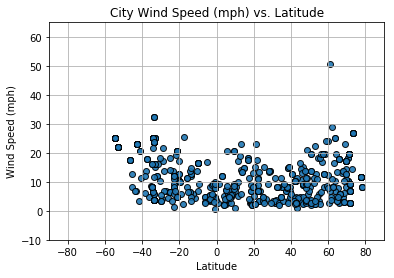

In [264]:
# wind v. lat
plt.scatter(city_df["Lat"], 
            city_df["Wind Speed"],
            edgecolor="k", linewidths=1, marker="o", 
            alpha=0.9)

# format graph 
plt.grid()
plt.xlim([-90, 90])
plt.ylim([-10, 65])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Wind Speed (mph) vs. Latitude")

# save figure
plt.savefig("wind_lat.png")

# show plot
plt.show()